In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_makers=pd.read_csv("C:/Users/Dell/Desktop/RPC12_Input_For_Participants/datasets/electric_vehicle_sales_by_makers.csv")
data_state=pd.read_csv("C:/Users/Dell/Desktop/RPC12_Input_For_Participants/datasets/electric_vehicle_sales_by_state.csv")
data_date=pd.read_csv("C:/Users/Dell/Desktop/RPC12_Input_For_Participants/datasets/dim_date.csv")

# data cleaning / manipulation

In [7]:
data_makers.info()
#changing the data type
data_makers['date'] = pd.to_datetime(data_makers['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 25.6+ KB


In [9]:
data_state.info()
#changing the data type
data_state['date'] = pd.to_datetime(data_state['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2445 non-null   datetime64[ns]
 1   state                   2445 non-null   object        
 2   vehicle_category        2445 non-null   object        
 3   electric_vehicles_sold  2445 non-null   int64         
 4   total_vehicles_sold     2445 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 95.6+ KB


In [11]:
data_date.info()
#changing the data type
data_date['date'] = pd.to_datetime(data_date['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         36 non-null     datetime64[ns]
 1   fiscal_year  36 non-null     int64         
 2   quarter      36 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 996.0+ bytes


In [230]:
# Merge DataFrames on common column 'date'
data_merged=pd.merge(data_date, data_makers, on='date')
# data_merged=pd.merge(data_merged, data_state, on='date')
data_merged

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585


# 1. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [399]:
# Filter Data for Fiscal Years 2023 and 2024
df_filtered=data_merged[data_merged['fiscal_year'].isin([2023,2024])]
df_2wheelers=df_filtered[(df_filtered['vehicle_category']=='2-Wheelers')]
df_2wheelers

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold,month
264,2022-04-01,2023,Q1,2-Wheelers,OKAYA EV,0,4
275,2022-04-01,2023,Q1,2-Wheelers,OLA ELECTRIC,13601,4
276,2022-04-01,2023,Q1,2-Wheelers,OKINAWA,11341,4
277,2022-04-01,2023,Q1,2-Wheelers,HERO ELECTRIC,6803,4
278,2022-04-01,2023,Q1,2-Wheelers,AMPERE,6864,4
...,...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070,3
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625,3
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915,3
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585,3


In [400]:
grouped_df_2wheelers=df_2wheelers.groupby(['maker','fiscal_year'])['electric_vehicles_sold'].sum().reset_index()
grouped_df_2wheelers_sorted = grouped_df_2wheelers.sort_values(by='electric_vehicles_sold', ascending=False)
grouped_df_2wheelers_sorted

,maker,fiscal_year,electric_vehicles_sold
18,OLA ELECTRIC,2024,322489
25,TVS,2024,180743
17,OLA ELECTRIC,2023,152583
3,ATHER,2024,107552
5,BAJAJ,2024,105695
15,OKINAWA,2023,96945
9,HERO ELECTRIC,2023,88993
0,AMPERE,2023,87376
24,TVS,2023,82093
20,OTHERS,2024,78660


In [76]:
def get_tb_makers(df,year):
    df_year=df[df['fiscal_year']== year]
    top_3 = df_year.nlargest(3, 'electric_vehicles_sold')
    bottom_3 = df_year.nsmallest(3, 'electric_vehicles_sold')
    return top_3, bottom_3
top_3_2023, bottom_3_2023 = get_tb_makers(grouped_df_2wheelers_sorted, 2023)
top_3_2024, bottom_3_2024 = get_tb_makers(grouped_df_2wheelers_sorted, 2024)

print("Top 3 Makers in Fiscal Year 2023 (2-Wheelers):")
print(top_3_2023)

print("\nBottom 3 Makers in Fiscal Year 2023 (2-Wheelers):")
print(bottom_3_2023)

print("\nTop 3 Makers in Fiscal Year 2024 (2-Wheelers):")
print(top_3_2024)

print("\nBottom 3 Makers in Fiscal Year 2024 (2-Wheelers):")
print(bottom_3_2024)

Top 3 Makers in Fiscal Year 2023 (2-Wheelers):
            maker  fiscal_year  electric_vehicles_sold
17   OLA ELECTRIC         2023                  152583
15        OKINAWA         2023                   96945
9   HERO ELECTRIC         2023                   88993

Bottom 3 Makers in Fiscal Year 2023 (2-Wheelers):
       maker  fiscal_year  electric_vehicles_sold
11  JITENDRA         2023                    8563
7      BEING         2023                   11018
21   PURE EV         2023                   11556

Top 3 Makers in Fiscal Year 2024 (2-Wheelers):
           maker  fiscal_year  electric_vehicles_sold
18  OLA ELECTRIC         2024                  322489
25           TVS         2024                  180743
3          ATHER         2024                  107552

Bottom 3 Makers in Fiscal Year 2024 (2-Wheelers):
              maker  fiscal_year  electric_vehicles_sold
6   BATTRE ELECTRIC         2024                    4841
23           REVOLT         2024                    7

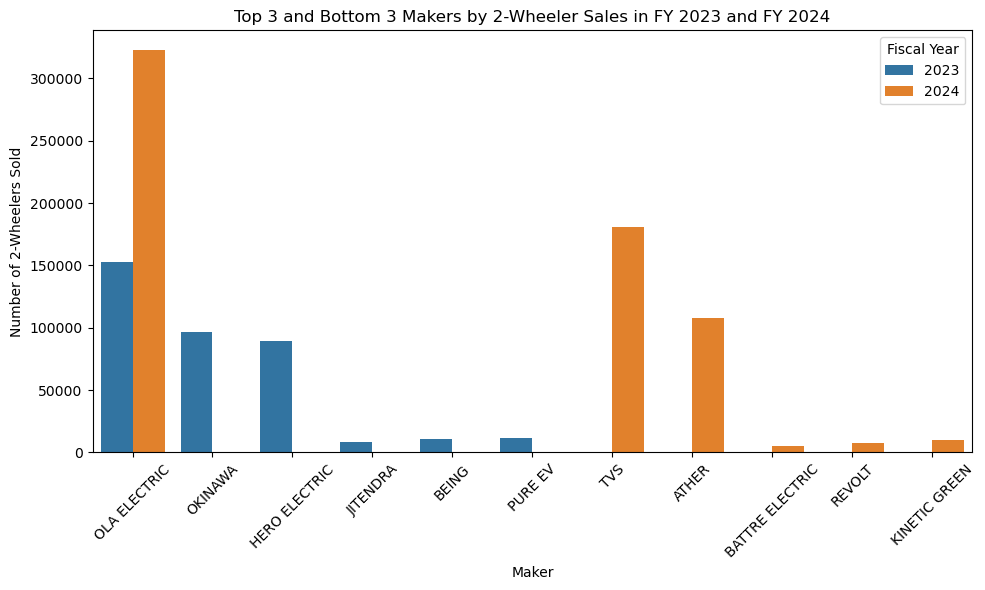

In [358]:
combined_df = pd.concat([top_3_2023, bottom_3_2023, top_3_2024, bottom_3_2024])

#Plotting the data
plt.figure(figsize=(10,6))
sns.barplot(x='maker', y='electric_vehicles_sold', hue='fiscal_year', data=combined_df)
plt.title('Top 3 and Bottom 3 Makers by 2-Wheeler Sales in FY 2023 and FY 2024')
plt.xlabel('Maker')
plt.ylabel('Number of 2-Wheelers Sold')
plt.xticks(rotation=45)
plt.legend(title='Fiscal Year')
plt.tight_layout()
plt.show()

# 2. Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024. 

In [401]:
# Merge DataFrames on common column 'date'
data_merged1=pd.merge(data_date, data_state, on='date')
# Filter data for fiscal_year 2024
df_filtered1=data_merged1[data_merged1['fiscal_year']==2024]
df_filtered1

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
1631,2023-04-01,2024,Q1,Sikkim,2-Wheelers,0,465
1632,2023-04-01,2024,Q1,Sikkim,4-Wheelers,0,439
1633,2023-04-01,2024,Q1,Andaman & Nicobar Island,2-Wheelers,0,325
1634,2023-04-01,2024,Q1,Arunachal Pradesh,2-Wheelers,0,971
1635,2023-04-01,2024,Q1,Ladakh,2-Wheelers,0,43
...,...,...,...,...,...,...,...
2440,2024-03-01,2024,Q4,Mizoram,2-Wheelers,58,1932
2441,2024-03-01,2024,Q4,DNH and DD,2-Wheelers,25,780
2442,2024-03-01,2024,Q4,Manipur,2-Wheelers,13,1394
2443,2024-03-01,2024,Q4,Andaman & Nicobar Island,2-Wheelers,2,447


In [123]:
# Separate 2-wheelers and 4-wheelers data
df_2w=df_filtered1[df_filtered1['vehicle_category']=='2-Wheelers']
df_4w=df_filtered1[df_filtered1['vehicle_category']=='4-Wheelers']

In [359]:
# Calculate penetration rate for each state
#Penetration Rate =  (Electric Vehicles Sold / Total Vehicles Sold) * 100
df_2w['penetration_rate_2w']=df_2w['electric_vehicles_sold']/df_2w['total_vehicles_sold']*100
df_4w['penetration_rate_4w']=df_4w['electric_vehicles_sold']/df_4w['total_vehicles_sold']*100

C:\Users\Dell\AppData\Local\Temp\ipykernel_13804\2074627314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2w['penetration_rate_2w']=df_2w['electric_vehicles_sold']/df_2w['total_vehicles_sold']*100
C:\Users\Dell\AppData\Local\Temp\ipykernel_13804\2074627314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4w['penetration_rate_4w']=df_4w['electric_vehicles_sold']/df_4w['total_vehicles_sold']*100


In [360]:
# Group by state
df_2w_state=df_2w.groupby('state')['penetration_rate_2w'].mean().reset_index()
df_4w_state=df_4w.groupby('state')['penetration_rate_4w'].mean().reset_index()

In [361]:
# Sort by penetration rate
top5_2w_states = df_2w_state.sort_values(by='penetration_rate_2w', ascending=False)
top5_4w_states = df_4w_state.sort_values(by='penetration_rate_4w', ascending=False)

In [362]:
# printing the top 5 states for both categories
print("Top 5 States for 2-Wheeler EV Penetration in FY 2024:")
print(top5_2w_states.head(5))

print("Top 5 States for 2-Wheeler EV Penetration in FY 2024:")
print(top5_4w_states.head(5))

Top 5 States for 2-Wheeler EV Penetration in FY 2024:
          state  penetration_rate_2w
10          Goa            18.184784
17       Kerala            13.610393
16    Karnataka            11.510878
20  Maharashtra            10.157240
9         Delhi             9.700033
Top 5 States for 2-Wheeler EV Penetration in FY 2024:
         state  penetration_rate_4w
17      Kerala            42.309117
6   Chandigarh             4.914759
10         Goa             4.369512
16   Karnataka             4.277313
9        Delhi             4.263585


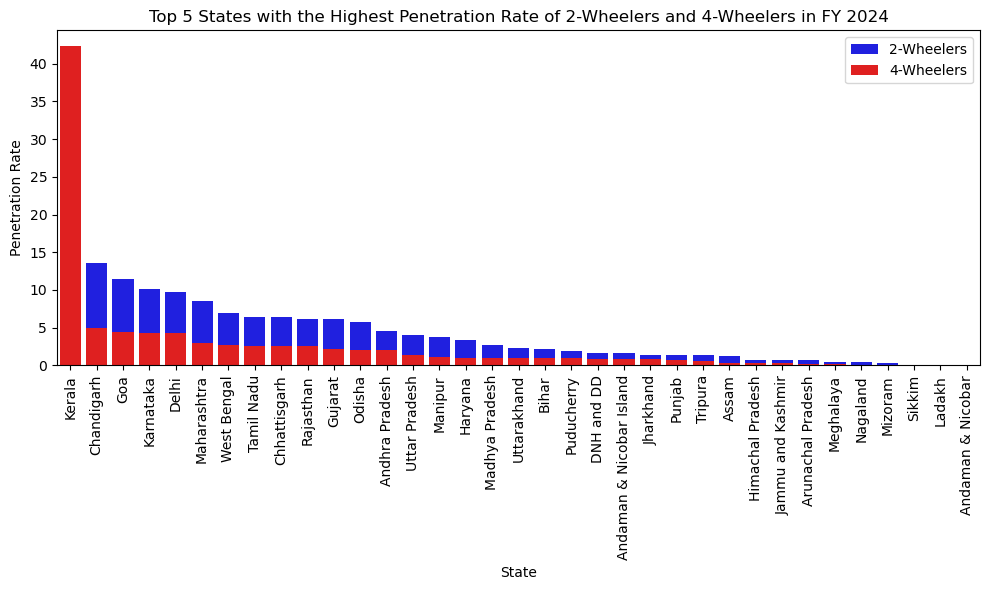

In [368]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='penetration_rate_2w', data=top5_2w_states, color='b', label='2-Wheelers')
sns.barplot(x='state', y='penetration_rate_4w', data=top5_4w_states, color='r', label='4-Wheelers')

plt.title('Top 5 States with the Highest Penetration Rate of 2-Wheelers and 4-Wheelers in FY 2024')
plt.xlabel('State')
plt.ylabel('Penetration Rate')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# 3. List the states with negative penetration (decline) in EV sales from 2022 to 2024?

In [402]:
# Filter data for FY 2022 and FY 2024
df_2022 = data_merged1[data_merged1['fiscal_year'] == 2022]
df_2024 = data_merged1[data_merged1['fiscal_year'] == 2024]

df_2022['penetration_rate_2022']=df_2022['electric_vehicles_sold']/df_2022['total_vehicles_sold']*100
df_2024['penetration_rate_2024']=df_2024['electric_vehicles_sold']/df_2024['total_vehicles_sold']*100

C:\Users\Dell\AppData\Local\Temp\ipykernel_13804\1154956327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['penetration_rate_2022']=df_2022['electric_vehicles_sold']/df_2022['total_vehicles_sold']*100
C:\Users\Dell\AppData\Local\Temp\ipykernel_13804\1154956327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['penetration_rate_2024']=df_2024['electric_vehicles_sold']/df_2024['total_vehicles_sold']*100


In [403]:
df_2022_state=df_2022.groupby('state')['penetration_rate_2022'].mean().reset_index()
df_2024_state=df_2024.groupby('state')['penetration_rate_2024'].mean().reset_index()

# Merge the two DataFrames on 'state' to compare penetration rates
df_comparison = pd.merge(df_2022_state[['state', 'penetration_rate_2022']],
                         df_2024_state[['state', 'penetration_rate_2024']],
                         on='state', how='inner')

In [408]:
# Identify states with a decline in penetration rate (negative rate)
df_comparison['penetration_change'] = df_comparison['penetration_rate_2024'] - df_comparison['penetration_rate_2022']

# Filter for states where penetration change is negative
states_with_decline = df_comparison[df_comparison['penetration_change'] < 0]
states_with_decline

,state,penetration_rate_2022,penetration_rate_2024,penetration_change
0,Andaman & Nicobar Island,0.648338,0.592370,-0.055968
17,Ladakh,2.638889,2.014572,-0.624317


# 4. What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024? 

In [409]:
#filter data by vehicle category (4-Wheelers) and fiscal year 2022,2023,2024
df_4wheelers=data_merged[(data_merged['vehicle_category']=='4-Wheelers') & data_merged['fiscal_year'].isin([2022,2023,2024])]
# total_sales_maker=df_4wheelers.groupby('maker')['electric_vehicles_sold'].sum().reset_index()
top5_makers=df_4wheelers.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5).index
top5_makers

Index(['Tata Motors', 'Mahindra & Mahindra', 'MG Motor', 'BYD India',
       'Hyundai Motor'],
      dtype='object', name='maker')

In [410]:
#filtering data set according to the top 5 makers
df_top5_makers = df_4wheelers[df_4wheelers['maker'].isin(top5_makers)]
# groupby (fiscal year, quarter and maker)
df_quarterly_trends = df_top5_makers.groupby(['fiscal_year', 'quarter', 'maker'])['electric_vehicles_sold'].sum().reset_index()
df_quarterly_trends

,fiscal_year,quarter,maker,electric_vehicles_sold
0,2022,Q1,BYD India,0
1,2022,Q1,Hyundai Motor,25
2,2022,Q1,MG Motor,285
3,2022,Q1,Mahindra & Mahindra,355
4,2022,Q1,Tata Motors,1031
5,2022,Q2,BYD India,0
6,2022,Q2,Hyundai Motor,34
7,2022,Q2,MG Motor,798
8,2022,Q2,Mahindra & Mahindra,651
9,2022,Q2,Tata Motors,2052


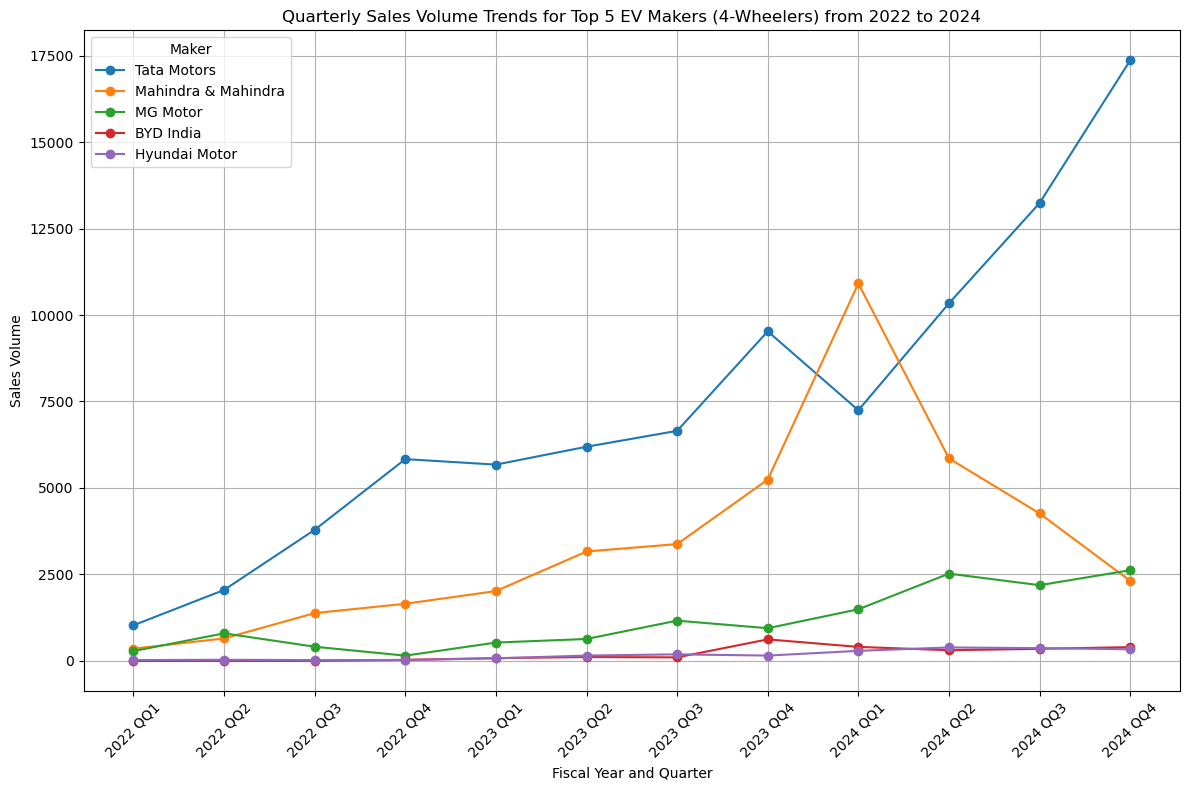

In [197]:
#visualise the trends
plt.figure(figsize=(12, 8))

for maker in top5_makers:
    maker_data = df_quarterly_trends[df_quarterly_trends['maker'] == maker]
    plt.plot(maker_data['fiscal_year'].astype(str) + " Q" + maker_data['quarter'].astype(str),
             maker_data['electric_vehicles_sold'], marker='o', label=maker)

plt.title('Quarterly Sales Volume Trends for Top 5 EV Makers (4-Wheelers) from 2022 to 2024')
plt.xlabel('Fiscal Year and Quarter')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.legend(title='Maker')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024? 

In [372]:
df_fil_2024=data_merged1[data_merged1['fiscal_year']==2024]
df_fil_del_kar=df_fil_2024[df_fil_2024['state'].isin(['Delhi','Karnataka'])]

In [223]:
state_total=df_fil_del_kar.groupby('state').agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()
state_total

,state,electric_vehicles_sold,total_vehicles_sold
0,Delhi,46724,606348
1,Karnataka,160989,1581988


In [225]:
state_total['penetration_rate'] = state_total['electric_vehicles_sold'] / state_total['total_vehicles_sold']
print("EV Sales and Penetration Rates in Delhi and Karnataka for FY 2024:")
print(state_total[['state', 'electric_vehicles_sold', 'total_vehicles_sold', 'penetration_rate']])

EV Sales and Penetration Rates in Delhi and Karnataka for FY 2024:
       state  electric_vehicles_sold  total_vehicles_sold  penetration_rate
0      Delhi                   46724               606348          0.077058
1  Karnataka                  160989              1581988          0.101764


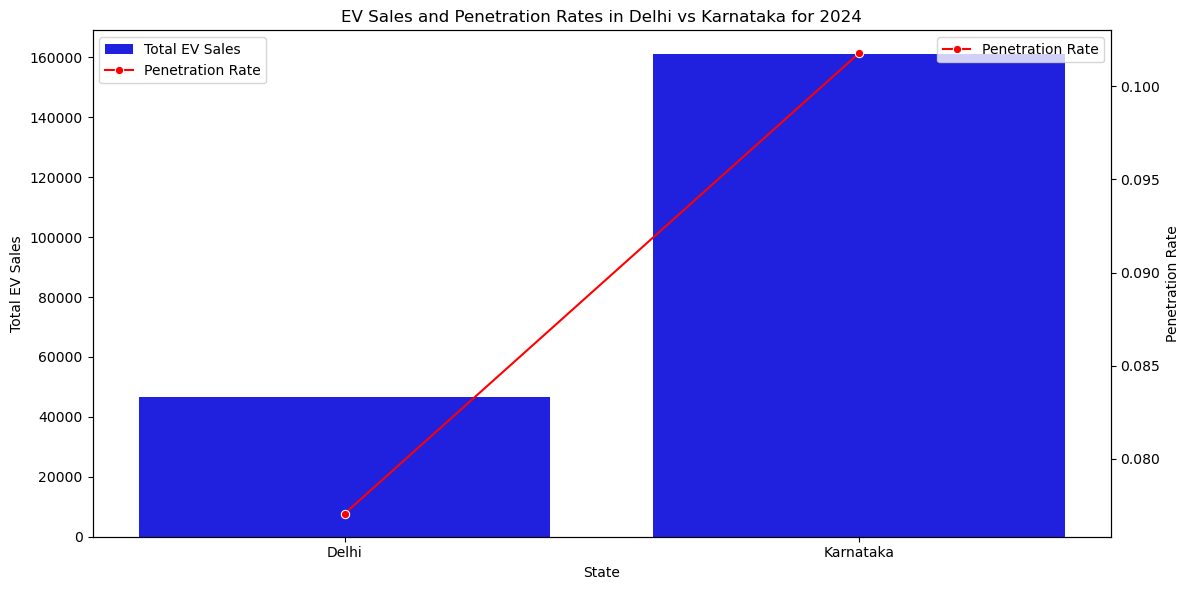

In [373]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total EV sales
sns.barplot(x='state', y='electric_vehicles_sold', data=state_total, color='blue', label='Total EV Sales', ax=ax1)
ax1.set_xlabel('State')
ax1.set_ylabel('Total EV Sales')
ax1.set_title('EV Sales and Penetration Rates in Delhi vs Karnataka for 2024')

# Create a second y-axis for penetration rates
ax2 = ax1.twinx()
sns.lineplot(x='state', y='penetration_rate', data=state_total, color='red', marker='o', label='Penetration Rate', ax=ax2)
ax2.set_ylabel('Penetration Rate')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# 6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [236]:
#filter data by vehicle category (4-Wheelers)
df_4wheelers=data_merged[(data_merged['vehicle_category']=='4-Wheelers')]
df_4wheelers

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
5,2021-04-01,2022,Q1,4-Wheelers,KIA Motors,0
...,...,...,...,...,...,...
798,2024-03-01,2024,Q4,4-Wheelers,PCA Automobiles,130
799,2024-03-01,2024,Q4,4-Wheelers,BMW India,55
800,2024-03-01,2024,Q4,4-Wheelers,Mercedes -Benz AG,31
801,2024-03-01,2024,Q4,4-Wheelers,Volvo Auto India,39


In [272]:
total_sales_2022=df_4wheelers[df_4wheelers['fiscal_year']==2022].groupby('maker')['electric_vehicles_sold'].sum().reset_index()
total_sales_2024=df_4wheelers[df_4wheelers['fiscal_year']==2024].groupby('maker')['electric_vehicles_sold'].sum().reset_index()
print(total_sales_2022)
print(total_sales_2024)

                 maker  electric_vehicles_sold
0            BMW India                       7
1            BYD India                      33
2        Hyundai Motor                     110
3           KIA Motors                       0
4             MG Motor                    1647
5  Mahindra & Mahindra                    4042
6    Mercedes -Benz AG                      26
7      PCA Automobiles                       0
8          Tata Motors                   12708
9     Volvo Auto India                       4
                 maker  electric_vehicles_sold
0            BMW India                    1078
1            BYD India                    1466
2        Hyundai Motor                    1390
3           KIA Motors                     328
4             MG Motor                    8829
5  Mahindra & Mahindra                   23346
6    Mercedes -Benz AG                     291
7      PCA Automobiles                    1533
8          Tata Motors                   48181
9     Volvo A

In [377]:
df_sales = pd.merge(total_sales_2022, total_sales_2024, on='maker')

# Calculating CAGR for each maker
df_sales['CAGR'] = ((df_sales['electric_vehicles_sold_y'] / df_sales['electric_vehicles_sold_x']) ** (1/2)) - 1

In [380]:
top_5_makers = df_sales.nlargest(5, 'electric_vehicles_sold_y')

# List down the top 5 makers and their CAGR
print("Top 5 Makers and their CAGR from 2022 to 2024 (4-Wheelers):")
print(top_5_makers[['maker', 'electric_vehicles_sold_x', 'electric_vehicles_sold_y', 'CAGR']])

Top 5 Makers and their CAGR from 2022 to 2024 (4-Wheelers):
                 maker  electric_vehicles_sold_x  electric_vehicles_sold_y  \
8          Tata Motors                     12708                     48181   
5  Mahindra & Mahindra                      4042                     23346   
4             MG Motor                      1647                      8829   
7      PCA Automobiles                         0                      1533   
1            BYD India                        33                      1466   

       CAGR  
8  0.947150  
5  1.403301  
4  1.315309  
7       inf  
1  5.665151  


# 7. List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [382]:
state_sales_2022=data_merged1[data_merged1['fiscal_year']==2022].groupby('state')['total_vehicles_sold'].sum().reset_index()
state_sales_2024=data_merged1[data_merged1['fiscal_year']==2024].groupby('state')['total_vehicles_sold'].sum().reset_index()

In [296]:
df_sales_state = pd.merge(state_sales_2022, state_sales_2024, on='state')
df_sales_state
# Calculating CAGR for each maker
df_sales_state['CAGR'] = ((df_sales_state['total_vehicles_sold_y'] / df_sales_state['total_vehicles_sold_x']) ** (1/2)) - 1

In [297]:
top10_state = df_sales_state.nlargest(10, 'total_vehicles_sold_y')

# List down the top 5 makers and their CAGR
print("Top 10 Makers and their CAGR from 2022 to 2024")
print(top10_state[['state', 'total_vehicles_sold_x', 'total_vehicles_sold_y', 'CAGR']])

Top 10 Makers and their CAGR from 2022 to 2024
             state  total_vehicles_sold_x  total_vehicles_sold_y      CAGR
31   Uttar Pradesh                2497288                2932347  0.083611
19     Maharashtra                1667002                2293994  0.173081
29      Tamil Nadu                1345017                1716940  0.129831
10         Gujarat                1094872                1590987  0.205457
15       Karnataka                1007894                1581988  0.252836
27       Rajasthan                 880985                1300476  0.214974
18  Madhya Pradesh                 967179                1286182  0.153182
4            Bihar                 892873                1132703  0.126324
33     West Bengal                 860709                 961909  0.057155
1   Andhra Pradesh                 772748                 782865  0.006525


# 8. What are the peak and low season months for EV sales based on the data from 2022 to 2024? 

In [398]:
# Extract the month from the 'date' column
data_merged['month'] = data_merged['date'].dt.month

monthly_sales = data_merged.groupby('month')['electric_vehicles_sold'].sum().reset_index()

In [395]:
peak_mon = monthly_sales.loc[monthly_sales['electric_vehicles_sold'].idxmax()]
low_mon = monthly_sales.loc[monthly_sales['electric_vehicles_sold'].idxmin()]

In [396]:
# Display the results
print("Peak Season Month for EV Sales (2022 to 2024):")
print(peak_mon)
print()
print("Low Season Month for EV Sales (2022 to 2024):")
print(low_mon)

Peak Season Month for EV Sales (2022 to 2024):
month                          3
electric_vehicles_sold    291587
Name: 2, dtype: int64

Low Season Month for EV Sales (2022 to 2024):
month                          6
electric_vehicles_sold    106709
Name: 5, dtype: int64


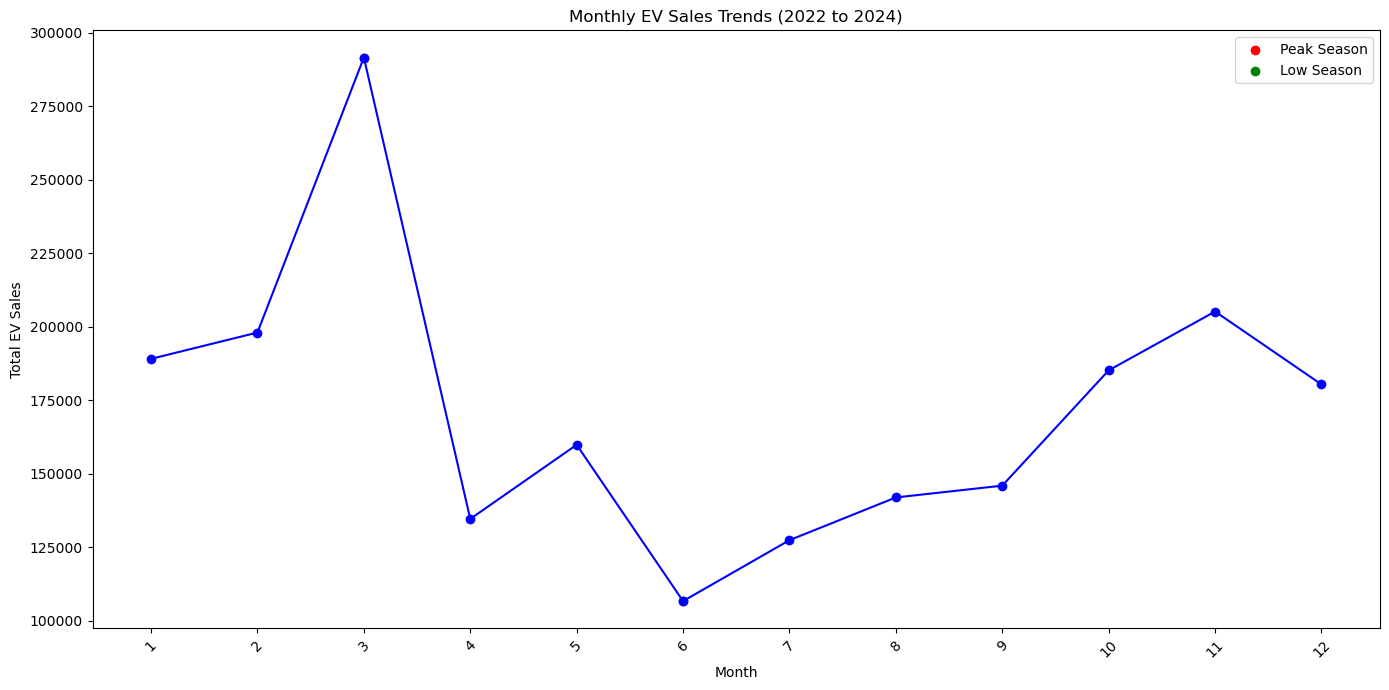

In [397]:
# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['electric_vehicles_sold'], marker='o', color='b', linestyle='-')
plt.title('Monthly EV Sales Trends (2022 to 2024)')
plt.xlabel('Month')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight peak and low season months
peak_month = monthly_sales.loc[monthly_sales['electric_vehicles_sold'].idxmax()]
low_month = monthly_sales.loc[monthly_sales['electric_vehicles_sold'].idxmin()]

plt.scatter(peak_month['month'].astype(str), peak_month['electric_vehicles_sold'], color='red', label='Peak Season')
plt.scatter(low_month['month'].astype(str), low_month['electric_vehicles_sold'], color='green', label='Low Season')
plt.legend()

plt.show()

# 9. What is the projected number of EV sales (including 2-wheelers and 4wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

In [319]:
#filtering data with fiscal year and group by state with ev sold.
df_2022_p = data_merged1[data_merged1['fiscal_year'] == 2022].groupby('state')['electric_vehicles_sold'].sum().reset_index()
df_2024_p = data_merged1[data_merged1['fiscal_year'] == 2024].groupby('state')['electric_vehicles_sold'].sum().reset_index()

In [326]:
# merged2022 and 2024 data
df_cagr=pd.merge(df_2022_p,df_2024_p, on='state', suffixes=('_2022','_2024'))
# calculate cagr and find top 10 states
df_cagr['CAGR'] = ((df_cagr['electric_vehicles_sold_2024'] / df_cagr['electric_vehicles_sold_2022']) ** (1/2)) - 1
top_10_states = df_cagr.nlargest(10, 'CAGR')
top_10_states

,state,electric_vehicles_sold_2022,electric_vehicles_sold_2024,CAGR
2,Arunachal Pradesh,0,31,inf
22,Mizoram,0,275,inf
21,Meghalaya,4,133,4.766281
30,Tripura,28,304,2.295018
23,Nagaland,1,9,2.000000
5,Chandigarh,411,2877,1.645751
6,Chhattisgarh,4534,28540,1.508917
33,West Bengal,2685,16864,1.506156
9,Goa,1778,10799,1.464483
7,DNH and DD,35,198,1.378475


In [330]:
# Project EV sales for 2030 using the CAGR formula
# Projected Sales in 2030=Sales in 2024×(1+CAGR)n
# Where:
# Sales in 2024 = The number of EVs sold in 2024.
# CAGR = The compounded annual growth rate from previous years.
# n = The number of years from 2024 to 2030 (which is 6 years).

top_10_states['projected_sales_2030'] = top_10_states['electric_vehicles_sold_2024'] * (1 + top_10_states['CAGR']) ** 6
top_10_states['projected_sales_2030']

2              inf
22             inf
21    4.889074e+06
30    3.890633e+05
23    6.561000e+03
5     9.868110e+05
6     7.118219e+06
33    4.178395e+06
9     2.419574e+06
7     3.584731e+04
Name: projected_sales_2030, dtype: float64

In [333]:
# Display the projected sales for 2030
print("Projected EV Sales for Top 10 States in 2030:")
print(top_10_states[['state', 'electric_vehicles_sold_2024', 'CAGR', 'projected_sales_2030']])

Projected EV Sales for Top 10 States in 2030:
                state  electric_vehicles_sold_2024      CAGR  \
2   Arunachal Pradesh                           31       inf   
22            Mizoram                          275       inf   
21          Meghalaya                          133  4.766281   
30            Tripura                          304  2.295018   
23           Nagaland                            9  2.000000   
5          Chandigarh                         2877  1.645751   
6        Chhattisgarh                        28540  1.508917   
33        West Bengal                        16864  1.506156   
9                 Goa                        10799  1.464483   
7          DNH and DD                          198  1.378475   

    projected_sales_2030  
2                    inf  
22                   inf  
21          1.615977e+02  
30          3.177701e+02  
23          2.100000e+01  
5           2.886875e+03  
6           2.854905e+04  
33          1.687304e+04  
9     

# 10.Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price. H 

In [345]:
# Filter the data for 2-wheelers and 4-wheelers.

df_2w_2022=data_merged[(data_merged['fiscal_year']==2022) & (data_merged['vehicle_category']=='2-Wheelers')]['electric_vehicles_sold'].sum()
df_2w_2023=data_merged[(data_merged['fiscal_year']==2023) & (data_merged['vehicle_category']=='2-Wheelers')]['electric_vehicles_sold'].sum()
df_2w_2024=data_merged[(data_merged['fiscal_year']==2024) & (data_merged['vehicle_category']=='2-Wheelers')]['electric_vehicles_sold'].sum()                                          


df_4w_2022=data_merged[(data_merged['fiscal_year']==2022) & (data_merged['vehicle_category']=='4-Wheelers')]['electric_vehicles_sold'].sum()
df_4w_2023=data_merged[(data_merged['fiscal_year']==2023) & (data_merged['vehicle_category']=='4-Wheelers')]['electric_vehicles_sold'].sum()
df_4w_2024=data_merged[(data_merged['fiscal_year']==2024) & (data_merged['vehicle_category']=='4-Wheelers')]['electric_vehicles_sold'].sum()                                                             

In [346]:
# Given data: Average prices
average_price_2w = 85000  # 2-wheelers in Rupees
average_price_4w = 1500000  # 4-wheelers in Rupees

In [347]:
# Calculate total revenue for each year
revenue_2w_2022 = df_2w_2022 * average_price_2w
revenue_2w_2023 = df_2w_2023 * average_price_2w
revenue_2w_2024 = df_2w_2024 * average_price_2w

revenue_4w_2022 = df_4w_2022 * average_price_4w
revenue_4w_2023 = df_4w_2023 * average_price_4w
revenue_4w_2024 = df_4w_2024 * average_price_4w

In [348]:
# Calculate the growth rates
growth_2w_2022_2024 = (revenue_2w_2024 - revenue_2w_2022) / revenue_2w_2022 * 100
growth_2w_2023_2024 = (revenue_2w_2024 - revenue_2w_2023) / revenue_2w_2023 * 100

growth_4w_2022_2024 = (revenue_4w_2024 - revenue_4w_2022) / revenue_4w_2022 * 100
growth_4w_2023_2024 = (revenue_4w_2024 - revenue_4w_2023) / revenue_4w_2023 * 100

In [352]:
# Display the results
print(f"2-Wheeler Revenue Growth (2022 vs 2024): {growth_2w_2022_2024:.2f}%")
print(f"2-Wheeler Revenue Growth (2023 vs 2024): {growth_2w_2023_2024:.2f}%")
print()
print(f"4-Wheeler Revenue Growth (2022 vs 2024): {growth_4w_2022_2024:.2f}%")
print(f"4-Wheeler Revenue Growth (2023 vs 2024): {growth_4w_2023_2024:.2f}%")

2-Wheeler Revenue Growth (2022 vs 2024): 269.28%
2-Wheeler Revenue Growth (2023 vs 2024): 28.13%

4-Wheeler Revenue Growth (2022 vs 2024): 367.79%
4-Wheeler Revenue Growth (2023 vs 2024): 83.08%
